In [1]:
mat_sap = './data_baby_posture/mat_sap/'
mat_ngua = './data_baby_posture/mat_ngua/'
nam_ngua = './data_baby_posture/nam_ngua/'
nam_sap = './data_baby_posture/nam_sap/'
nam_nghieng = './data_baby_posture/nam_nghieng/'

In [2]:
import os
import requests
from tqdm import tqdm # Thư viện để hiển thị thanh tiến trình
import time

# --- Cấu hình ---
# Địa chỉ API của bạn (thay đổi nếu cần)
API_URL = "http://127.0.0.1:8080/api/pipeline_image/analyze"

In [3]:
%pip install -q requests tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
EXPECTED_FACE_DOWN = {
    'mat_sap': True,
    'mat_ngua': False
}

IMAGE_EXTENSIONS = ('.png', '.jpg', '.jpeg')

def list_image_files(folder_path):
    """Liệt kê tất cả các file ảnh trong một thư mục."""
    images = []
    if not os.path.isdir(folder_path):
        print(f"Lỗi: Thư mục không tồn tại - {folder_path}")
        return images
    try:
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(IMAGE_EXTENSIONS):
                images.append(os.path.join(folder_path, filename))
    except Exception as e:
        print(f"Lỗi khi đọc thư mục {folder_path}: {e}")
    return images


def call_analyze_api(image_path):
    """Gọi API phân tích ảnh và trả về kết quả 'face_down'."""
    try:
        with open(image_path, 'rb') as f:
            files = {'file': (os.path.basename(image_path), f)}
            # Gửi request POST tới API
            response = requests.post(API_URL, files=files, timeout=60) 
            response.raise_for_status()

            # Parse kết quả JSON
            result = response.json()

            if result.get("success") and "posture" in result and "face_down" in result["posture"]:
                return result["posture"]["face_down"]
            else:
                error_msg = result.get("detail", result.get("message", "Phản hồi API không thành công hoặc thiếu dữ liệu"))
                print(f"\nLỗi API cho ảnh {os.path.basename(image_path)}: {error_msg}")
                return None # Trả về None nếu có lỗi hoặc cấu trúc không đúng

    except requests.exceptions.Timeout:
        print(f"\nLỗi: Timeout khi gọi API cho ảnh {os.path.basename(image_path)}")
        return None
    except requests.exceptions.RequestException as e:
        print(f"\nLỗi kết nối hoặc HTTP khi gọi API cho ảnh {os.path.basename(image_path)}: {e}")
        return None
    except Exception as e:
        print(f"\nLỗi không xác định khi xử lý ảnh {os.path.basename(image_path)}: {e}")
        return None


In [5]:
mat_ngua_all = list_image_files(mat_ngua)
print(mat_ngua_all)
print("So luong file mat_ngua:" , len(mat_ngua_all))

mat_sap_all = list_image_files(mat_sap)
print(mat_sap_all)
print("So luong file mat_sap:" , len(mat_sap_all))

['./data_baby_posture/mat_ngua/1.jpg', './data_baby_posture/mat_ngua/10.jpg', './data_baby_posture/mat_ngua/11.jpg', './data_baby_posture/mat_ngua/113.jpg', './data_baby_posture/mat_ngua/114.jpg', './data_baby_posture/mat_ngua/12.jpg', './data_baby_posture/mat_ngua/13.jpg', './data_baby_posture/mat_ngua/130.jpg', './data_baby_posture/mat_ngua/131.jpg', './data_baby_posture/mat_ngua/14.jpg', './data_baby_posture/mat_ngua/146.jpg', './data_baby_posture/mat_ngua/147.jpg', './data_baby_posture/mat_ngua/15.jpg', './data_baby_posture/mat_ngua/16.jpg', './data_baby_posture/mat_ngua/17.jpg', './data_baby_posture/mat_ngua/18.jpg', './data_baby_posture/mat_ngua/19.jpg', './data_baby_posture/mat_ngua/2.jpg', './data_baby_posture/mat_ngua/20.jpg', './data_baby_posture/mat_ngua/21.jpg', './data_baby_posture/mat_ngua/22.jpg', './data_baby_posture/mat_ngua/23.jpg', './data_baby_posture/mat_ngua/24.jpg', './data_baby_posture/mat_ngua/25.jpg', './data_baby_posture/mat_ngua/26.jpg', './data_baby_posture

Output:  False


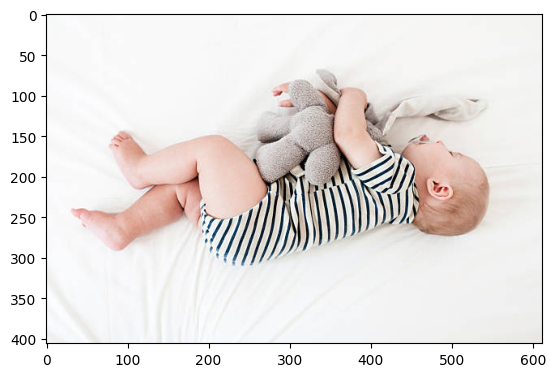

In [6]:
# test call api
#load ảnh và hiên thị từ url
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

image = cv2.imread(mat_ngua_all[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR sang RGB
plt.imshow(image)
resp = call_analyze_api(mat_ngua_all[0])
print("Output: ", resp)

In [7]:
def Try_api(all_image):
    out = {
        "T": 0,
        "F": 0,
        "E": 0,
        "F_path": [],
        "E_path": [],
    }
    
    for i in range(len(all_image)):
        res = call_analyze_api(all_image[i])
        if res==True:
            out["T"] += 1
        elif res==False:
            out["F"] += 1
            out["F_path"] += all_image[i]
        elif res==None:
            out["E"] += 1
            out["E_path"] += all_image[i]
        else:
            out["E"] += 1
            out["E_path"] += all_image[i]
    return out

In [8]:
out_mat_ngua = Try_api(mat_ngua_all)

out_mat_sap = Try_api(mat_sap_all)


Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 14.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 101.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 104.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 121.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 129.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 13.jpg: 500 Server Error: Internal Server Error for url: http://127.0.0.1:8080/api/pipeline_image/analyze

Lỗi kết nối hoặc HTTP khi gọi API cho ảnh 148.jpg: 500 Server Error: Internal Server Error for url: h

In [9]:
print("Output mat_sap")
print(out_mat_sap)

print("output mat ngua")
print(out_mat_ngua)

Output mat_sap
{'T': 46, 'F': 16, 'E': 15, 'F_path': ['.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', 't', 'u', 'r', 'e', '/', 'm', 'a', 't', '_', 's', 'a', 'p', '/', '1', '1', '3', '.', 'j', 'p', 'g', '.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', 't', 'u', 'r', 'e', '/', 'm', 'a', 't', '_', 's', 'a', 'p', '/', '1', '1', '5', '.', 'j', 'p', 'g', '.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', 't', 'u', 'r', 'e', '/', 'm', 'a', 't', '_', 's', 'a', 'p', '/', '1', '2', '6', '.', 'j', 'p', 'g', '.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', 't', 'u', 'r', 'e', '/', 'm', 'a', 't', '_', 's', 'a', 'p', '/', '1', '3', '7', '.', 'j', 'p', 'g', '.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', 't', 'u', 'r', 'e', '/', 'm', 'a', 't', '_', 's', 'a', 'p', '/', '1', '4', '.', 'j', 'p', 'g', '.', '/', 'd', 'a', 't', 'a', '_', 'b', 'a', 'b', 'y', '_', 'p', 'o', 's', '